<a href="https://colab.research.google.com/github/alyssaimani/Drug_Discovery_Acetylcholinesterase/blob/main/Drug_Discovery_acetylcholinesterase_Regression_with_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Bioinformatics/Acetylcholinesterase/acetylcholinesterase_bioactivity_data_3class_pIC50_pubchem_fp.csv") 

# **Input Features**
The **Acetylcholinesterase** data set contains 881 input features and 1 output variable

In [ ]:
x = df.drop('pIC50', axis=1)
x

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3592,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3593,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3594,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3595,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# **Output Features**

In [ ]:
y = df.pIC50
y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
3592    6.372634
3593    6.263603
3594    5.247952
3595    5.017729
3596    5.148742
Name: pIC50, Length: 3597, dtype: float64

In [ ]:
x.shape

(3597, 881)

In [ ]:
y.shape

(3597,)

## **Remove low variance features**

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
x = selection.fit_transform(x)

In [ ]:
x.shape

(3597, 136)

# **Data Split (80/20 ratio)**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
x_train.shape, y_train.shape

((2877, 136), (2877,))

In [ ]:
x_test.shape, y_test.shape

((720, 136), (720,))

# **Build a Regression Model using Random Forest**

In [ ]:
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
r2 = model.score(x_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("r2 :", r2)
print("MSE :", mse)

r2 : 0.5328372044915908
MSE : 1.2121900023457497


# **Scatter Plot of Experimental vs Predicted pIC50 Values**

<function matplotlib.pyplot.show(close=None, block=None)>

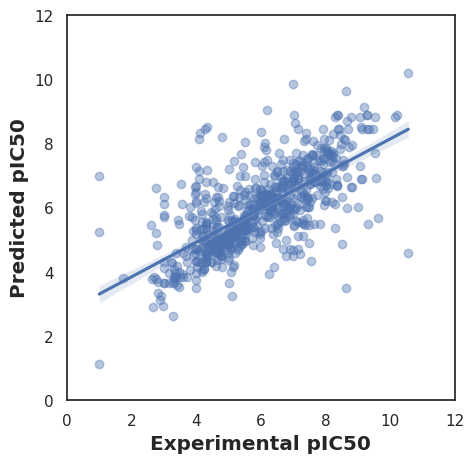

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


y_test = pd.DataFrame(np.array(y_test), columns=['actual value'])
y_pred = pd.DataFrame(y_pred, columns=['predicted'])
data = pd.concat([y_test, y_pred], axis=1)
sns.set(color_codes=True)
sns.set_style("white")
ax = sns.regplot(x='actual value', y='predicted',data = data, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [ ]:
import pickle
pickle.dump(model, open('/content/gdrive/My Drive/Colab Notebooks/Bioinformatics/Acetylcholinesterase/random_forest_regression.pkl', 'wb'))